In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Lambda
import matplotlib.pyplot as plt

In [2]:
tf.random.set_seed(37)

In [3]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='training_loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, max(history.history['loss'])+10])
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

In [4]:
file = "path/to/file"
array = np.genfromtxt(file, delimiter=",")

In [5]:
array.shape

(155, 12)

In [6]:
array[11][5:10], array[11]

(array([8.20000000e+01, 2.40000000e+01, 7.90000000e+01, 5.90000000e+01,
        5.48271752e-02]),
 array([7.00000000e+00, 1.08576000e+02, 5.33160000e+01, 3.33100000e+00,
        9.79000000e+01, 8.20000000e+01, 2.40000000e+01, 7.90000000e+01,
        5.90000000e+01, 5.48271752e-02, 8.70000000e+01, 9.30000000e+01]))

In [7]:
RATIO = 0.95 # train+validation / total
VAL_RATIO = 0.5 / RATIO
n_samples = array.shape[0]
len_train = int(n_samples*RATIO)
X_train = array[:len_train,:11]
Y_train = array[:len_train,11]
X_test = array[len_train:, :11]
Y_test = array[len_train:, 11]

In [8]:
model = Sequential([
    BatchNormalization(axis=-1, input_shape=(11, )),
    Dense(32, activation="leaky_relu"),
    Dense(1, activation="sigmoid"),
    Lambda(lambda x: x * 100)
])
model.compile(loss="mean_absolute_error", optimizer=tf.keras.optimizers.Adam(0.001))
model.summary()

/Users/daniele/miniforge3/envs/tf/lib/python3.9/site-packages/keras/src/layers/normalization/batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 11)             │            44 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda (Lambda)                 │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 461 (1.80 KB)

 Trainable params: 439 (1.71 KB)

 Non-trainable params: 22 (88.00 B)

In [9]:
history = model.fit(X_train, Y_train, epochs=35, batch_size=4, validation_split=VAL_RATIO)

Epoch 1/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30.8471 - val_loss: 63.4103
Epoch 2/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 27.4039 - val_loss: 63.4103
Epoch 3/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24.9210 - val_loss: 63.4103
Epoch 4/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.9878 - val_loss: 63.4102
Epoch 5/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21.2846 - val_loss: 63.4073
Epoch 6/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19.8304 - val_loss: 63.3440
Epoch 7/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 18.8756 - val_loss: 62.6567
Epoch 8/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 18.0370 - val_loss: 59.1992
Epoch 9/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 17.2564 - val_loss: 52.3376
Epoch 10/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 16.5108 - val_loss: 42.9266
Epoch 11/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 15.7624 - val_loss: 32.4483
Epoch 12/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

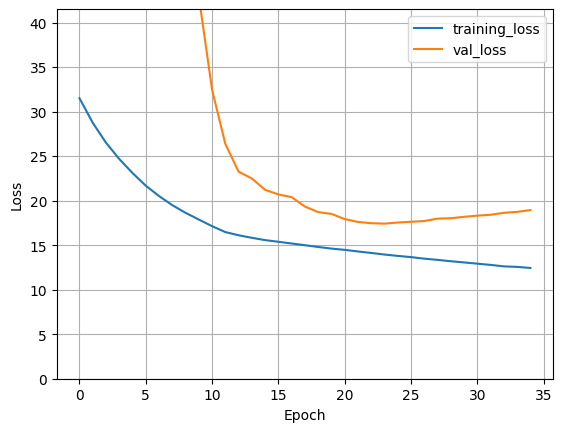

In [10]:
plot_loss(history)

In [11]:
loss = model.evaluate(X_test, Y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 21.5621


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


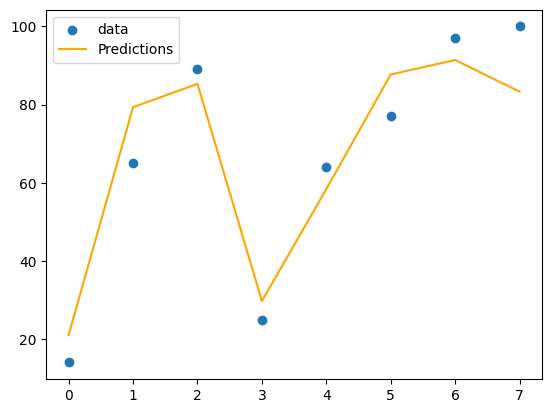

In [84]:
x = [i for i in range(0, len(Y_test))]
predictions = model.predict(X_test)
plt.scatter(x, Y_test, label="data")
plt.plot(x, predictions, label="Predictions", color="orange")
plt.legend()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step


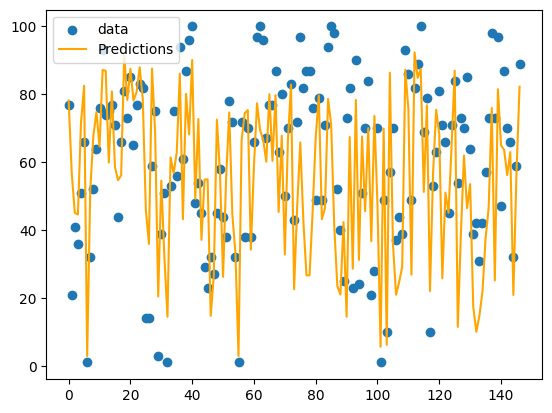

In [79]:
x = [i for i in range(0, len(Y_train))]
predictions = model.predict(X_train)
plt.scatter(x, Y_train, label="data")
plt.plot(x, predictions, label="Predictions", color="orange")
plt.legend()